<a href="https://colab.research.google.com/github/ste-hue/Hotel-Bookings-Dataset/blob/main/Hotel_bookings_EDA_Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# EXPLORATORY DATA ANALYSIS OF [HOTEL BOOKING DATASET](https://www.kaggle.com/jessemostipak/hotel-booking-demand#:~:text=Metadata-,Download%20(16%20MB),-New%20Notebook)
*(click on the blue part of the title to download the dataset)*



This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data. We will perform exploratory data analysis with python to get insight from the data.*

*We'll look for insights into the data to maximize profitability and customer segmentation for both hotels.



# IMPORTING THE DATA AND LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sci
import statsmodels.api as sm

read the csv file 

In [ ]:
hotel = pd.read_csv('/content/hotel_bookings.csv')
hotel.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA EXPLORATION

## General functions

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,0.0,0.0,0.0,0.0
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,NaN,NaN,NaN,NaN


## Finding null values

In [ ]:
NaN = hotel.isna().sum()
NaN

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# DATA CLEANING

## Dropping nulls
drop columns with nulls.
dropping 4 null values in'Children' 488 in 'Country'. It's a negligible sum of null values that can be dropped without skewing the data. 
'agent' and 'company' are not dropped because a null value there simply means that the booking was direct. We want to keep that information. 

In [ ]:
hotel = hotel.dropna(subset=['children', 'country',],axis=0)
hotel = hotel.drop(columns=[x for x in hotel.columns if x.startswith('Unnamed')])

hotel = hotel.reset_index(drop=True)
hotel.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

## Correlations

Here, we can see that a lot of columns are correlated with our business ask of seeing if there are distinct difference between the hotel types. Encoded the hotel type to be a 1 or 0 where 1 == 'Resort Hotel' and 0 == 'City Hotel'. So, if a positive correlation, it is correlated to resort hotel. If negative, it is correlated with city hotel.

This means that we will likely be able to pull out features can separate out hotel type.

Also, output a heatmap of general data column correlations. Here, while the values aren't necessarily statistically significant, we can see some relationships that might be of interest to us when exploring. Like arrival_date_week_number having a negative correlation with arrival_date_year and "children" having a slight relationship with "adr".

In [ ]:
# Output only statistically significant correlations of numerical columns against the label "hotel"
for col in hotel.columns:
  if col == 'hotel':
    continue
  try:
    corr, p_value = sci.stats.pearsonr(hotel[col], hotel['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0))
    if p_value < 0.05:
      print(f"column: {col}, correlation: {corr:.2f}, p_value: {p_value:.4f}")
  except:
    continue

column: is_canceled, correlation: -0.13, p_value: 0.0000
column: lead_time, correlation: -0.07, p_value: 0.0000
column: arrival_date_year, correlation: -0.03, p_value: 0.0000
column: stays_in_weekend_nights, correlation: 0.19, p_value: 0.0000
column: stays_in_week_nights, correlation: 0.24, p_value: 0.0000
column: adults, correlation: 0.02, p_value: 0.0000
column: children, correlation: 0.05, p_value: 0.0000
column: babies, correlation: 0.04, p_value: 0.0000
column: is_repeated_guest, correlation: 0.05, p_value: 0.0000
column: previous_cancellations, correlation: 0.01, p_value: 0.0000
column: booking_changes, correlation: 0.07, p_value: 0.0000
column: days_in_waiting_list, correlation: -0.07, p_value: 0.0000
column: adr, correlation: -0.09, p_value: 0.0000
column: required_car_parking_spaces, correlation: 0.22, p_value: 0.0000
column: total_of_special_requests, correlation: 0.04, p_value: 0.0000


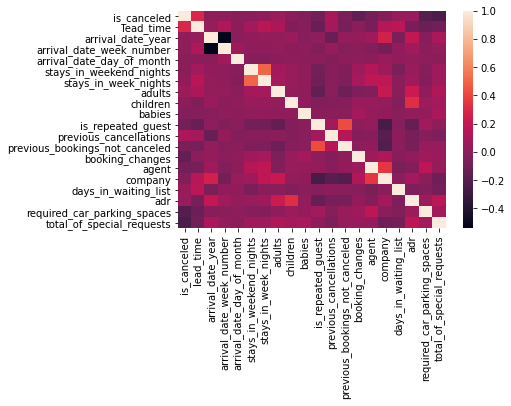

In [ ]:
sns.heatmap(hotel.corr())
plt.show()

## Changing types of columns 
 Turning"agent", "company","is_repeated guest" and "is_canceled" to a string.
 'agent' and 'company' are numeric, but are ID's. So they make more sense as a string type.

In [ ]:
hotel['agent']=hotel['agent'].astype(str)
hotel['company'] = hotel['company'].astype(str)
hotel['is_repeated_guest']=hotel['is_repeated_guest'].astype(str)
hotel['is_canceled']=hotel['is_canceled'].astype(str)

## Removing rows of non-sensical data

Some data entries have 0 'children', 0 'adults' and 0 'babies'. We're dropping those values. They probably represent incorrect data.

In [ ]:
zero_guests = list(hotel.loc[hotel["adults"]
                   + hotel["children"]
                   + hotel["babies"]==0].index)
hotel.drop(hotel.index[zero_guests], inplace=True)
hotel.shape

(118728, 32)

In [ ]:
#creating a new column with arrival date of year and month to tell time.(date and time)
hotel['arrival_date']=hotel['arrival_date_year'].map(str)+'-'+hotel['arrival_date_day_of_month'].map(str)

# CLEAN DATA VISUALIZATION
Not related to our goals, but this section is to look at different column in more depth in regards to how they relate to each other.

## Plot Adr by arrival date week number 


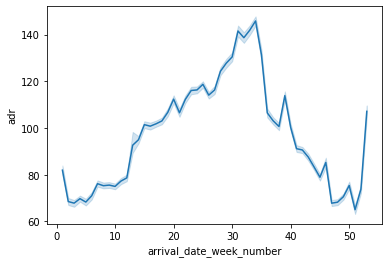

In [ ]:
 my_ploy = sns.lineplot(data=hotel,x='arrival_date_week_number',y='adr')



```
# This is formatted as code
```

## Mean adr by hotel by month
avg daily rate in resort and city hotel by month 
 For Resort hotel, highest season is August, for City Hotel is May.

 Resort has higher daily rates in the summer.
City's Adr is higher year round.

In [ ]:
hotel_resort = hotel[hotel['hotel']=='Resort Hotel']
resort_hotel = hotel_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

hotel_city = hotel[hotel['hotel']=='City Hotel']
city_hotel=hotel_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

resort_hotel.merge(city_hotel,on='arrival_date_month', suffixes=('_resort','_city'))

,arrival_date_month,adr_resort,adr_city
0,April,78.144752,111.397415
1,August,186.914071,114.895368
2,December,69.251749,89.209560
3,February,55.445661,85.327519
4,January,49.719668,82.754477
5,July,155.491181,110.945950
6,June,110.602658,119.186056
7,March,57.837386,92.973339
8,May,78.820186,121.764614
9,November,48.450142,88.372889


## See outliers
For lead_time, booking_changes, stays_in_weekend_nights, adr.
Creating a pairplot to compare a few kpi and observe their relatioship.

There is one huge outlier in 'adr'. over 5000. We looked at the median and mean and the difference is not big enough that it might skew the data. Since the outlier is only one row, we're going to get rid of it anyway because it likely represents bad data.



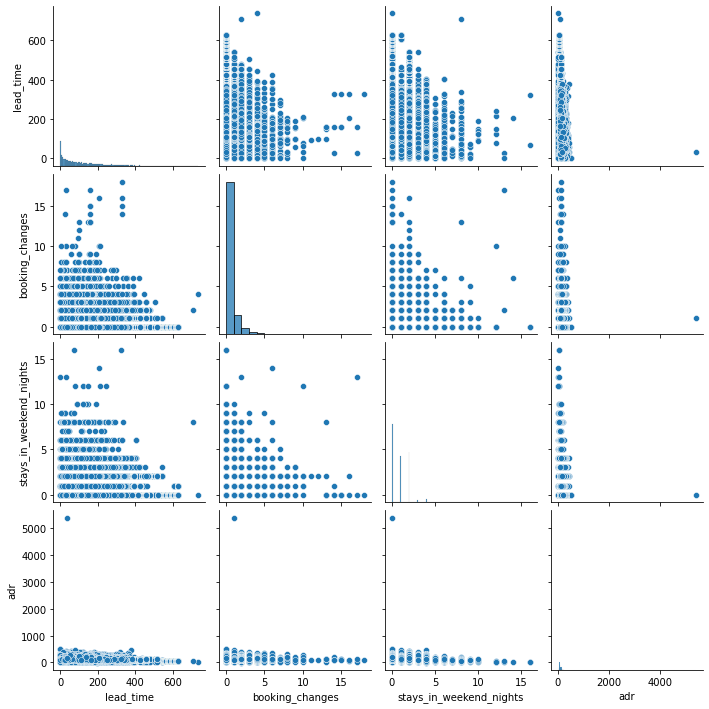

In [ ]:
sns.pairplot(data=hotel,vars=['lead_time','booking_changes','stays_in_weekend_nights','adr'])

In [ ]:
hotel[hotel['adr'] > 2000].shape

(1, 33)

## Cancelation proportion by hotel and month

There is a difference in the proportion of cancellations between City and Resort. We're going to examine various differences between city and resort hotel to come up with a strategy for the stakeholders. 

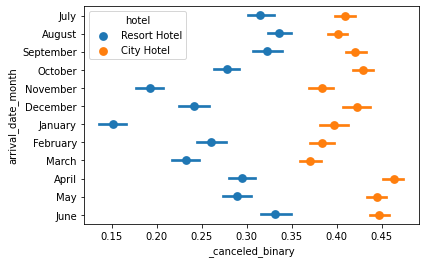

In [ ]:
canceled_data = hotel.copy()
canceled_data['_canceled_binary'] = canceled_data['is_canceled'].astype(int)

sns.pointplot(x='_canceled_binary',y='arrival_date_month',data=canceled_data ,hue='hotel',dodge=True,join=False)
plt.show()

# DATA CLEANING PART 2

## Getting rid of adr outlier


In [ ]:
hotel = hotel[hotel['adr']<1500]

# ANALYSIS FOR PROFITABILITY

## Question 1
Is Resort Hotel affected by cancelations differently than City hotel? and if yes in what way? we're running a chi square test to examine if the difference in proportion of cancelations between hotels is statistically significant.

We think we should treat cancelations differently between hotels. We expect to see less cancelations in Resort as opposed to the city. If that turns out to be true. It might be wise to have a harsher policy on cancelations in the city. 

**Hypothesis**.  
**H0:** "hotel has no influence on cancelation".  
**H1:** "hotel influences cancelations"


**Outcome**.  
p value is less than 0.05, so we reject the null. The hotel type has an influence on number of cancelations. Looking at the contingency table and the graph above in "[Cancelation proportion by hotel and month]" we can see that the city has a much high proportion of cancellations than the resort

Contingency table:
 hotel        City Hotel  Resort Hotel
is_canceled                          
0                 46082         28508
1                 33060         11077
Chi2 statistic 2147.954748357644 p_value 0.0


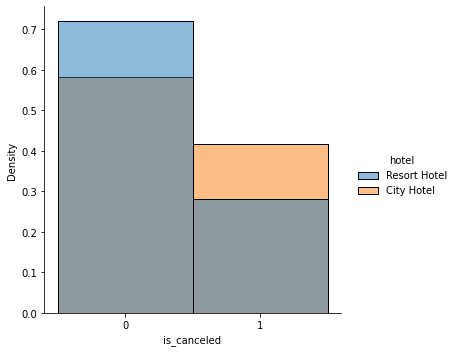

In [ ]:

contingency_table = pd.crosstab(hotel['is_canceled'],
                                hotel['hotel'], 
                                margins = False)
print("Contingency table:\n", contingency_table)

chi2, p, dof, ex = sci.stats.chi2_contingency(contingency_table)
print('Chi2 statistic', chi2, 'p_value', p)

sns.displot(hotel, x='is_canceled', hue='hotel',stat="density", common_norm=False)
plt.show()

## Question 2
Is there a different number of parking spaces needed depending on hotel?
If there is we can plan for the hotels differenly to have the most efficent number of spaces. 
First we'll observe the difference with a plot, next we'll test to see if the difference is statistically significant.

**Hypotheses**.  
**H0:** hotel type has no influence on number of parking spaces required per booking.  
**H1:** The hotel type does have influence on the number of parking spaces required per booking

**Outcome**.  
After performing the t-test, there is a significant difference in number of parking spaces between hotel types. This means, we should plan for our hotels differently in regards to amount of space leased/bought for parking.


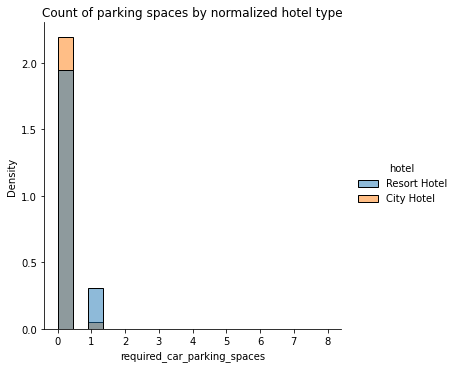

t_statistic: 61.12802085407045 p_value: 0.0


In [ ]:
sns.displot(hotel, x='required_car_parking_spaces', hue='hotel',stat="density", common_norm=False)
plt.title('Count of parking spaces by normalized hotel type')
plt.show()

sample_1 = hotel[hotel['hotel']=='Resort Hotel']['required_car_parking_spaces']
sample_2 = hotel[hotel['hotel']== 'City Hotel']['required_car_parking_spaces']
t_statistics , p_value = sci.stats.ttest_ind(sample_1, sample_2,equal_var=False) 
print(f"t_statistic: {t_statistics} p_value: {p_value}")

# ANALYSIS FOR CUSTOMER SEGMENTATION AND MARKETING

Here we want to explore to see if we should market the different types of hotels differently and if they have a different customer base.

## Question 1 
I think that there is a difference in the time between a person booking their hotel room and when they arrive. I think that resort hotels likely have a longer lead time than city hotels. This would influence how we market our hotels. If the lead time for resort hotels is longer, we should market events that are happening at a later date. 

For example, if lead time is 6 months, we should market summer activities and deals in the winter months. And, if lead time is much shorter like a week, then we should advertise events that are happening right then.

This test will tell us if we should change our marketing for resort hotels to be for events that are farther in the future.


**Hypotheses**.  
**H0:** There is no difference in lead time between the different hotel types.   
**H1:** Resort hotels have a longer lead time than city hotels.

**Outcome**.  
Our t statistic was negative, and p_value, while small for the two-tailed test, the t statistic was in the incorrect part of the graph. We failed to reject null.

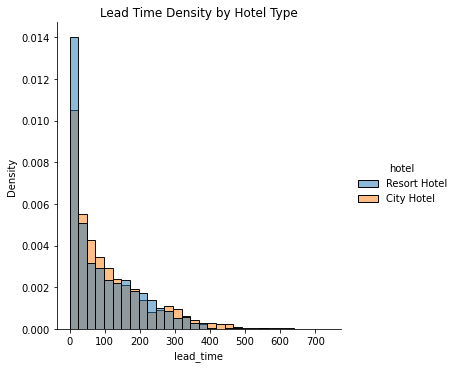

Mean lead time for city 0.024348639154936697
Mean lead time for resort 0.1370215990905646
t_statistic: -26.128059381164807 p_value: 3.234718352528085e-150


In [ ]:
# Plot the difference between hotel types in regards to lead time
sns.displot(hotel, x='lead_time', hue='hotel', stat="density", common_norm=False, bins=30)
plt.title('Lead Time Density by Hotel Type')
plt.show()

# Statistical test - t test

print("Mean lead time for city", sample_2.mean())
print("Mean lead time for resort", sample_1.mean())

sample_1 = hotel[hotel['hotel']=='Resort Hotel']['lead_time']
sample_2 = hotel[hotel['hotel']== 'City Hotel']['lead_time']

# This is two sided
t_statistics , p_value = sci.stats.ttest_ind(sample_1, sample_2,equal_var=False) 

# Change to be one sided
p_value_one_sided = p_value/2
print(f"t_statistic: {t_statistics} p_value: {p_value_one_sided}")

## Question 2  
Do the different types of hotels have a difference in number of nights people stays. If so, we should market differently. We can offer deals on booking for different amounts of stay to increase profits.

For example, if in general people stay in resorts longer than in cities, we can offer monthly discounts or weekly stays to entice them to stay longer. 

**Hypothesis**.  
H0: The hotel type has no influence on mean number of days a booking individual stays.   
H1: Bookings in resort hotels are for longer than in city hotels.   

**Outcome**.  
We should change way market towards different hotels. We have shown that people tend to stay in resorts longer than city hotels. So, when we are marketing, we should have different specials for the resort hotels (offering longer stays) than the city hotels.


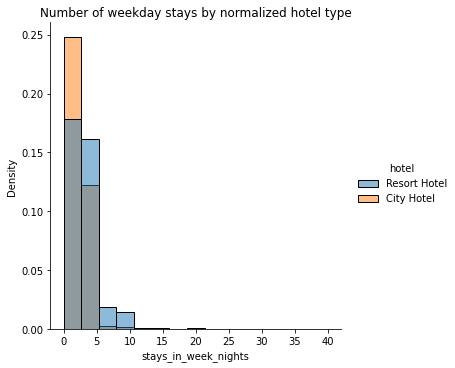

Mean week night stays for city 2.180687877486038
Mean week night stays for resort 3.1411898446381206
t_statistic: 72.18090273272372 p_value: 0.0


In [ ]:
# Statistical test - t test

# Plot the difference between hotel types in regards to stays in week nights
sns.displot(hotel, x='stays_in_week_nights', hue='hotel', stat="density", common_norm=False, bins=15)
plt.title('Number of weekday stays by normalized hotel type')
plt.show()

sample_1 = hotel[hotel['hotel']=='Resort Hotel']['stays_in_week_nights']
sample_2 = hotel[hotel['hotel']== 'City Hotel']['stays_in_week_nights']

print("Mean week night stays for city", sample_2.mean())
print("Mean week night stays for resort", sample_1.mean())

# This is two sided
t_statistics , p_value = sci.stats.ttest_ind(sample_1, sample_2,equal_var=False) 

# Change to be one sided
p_value_one_sided = p_value/2
print(f"t_statistic: {t_statistics} p_value: {p_value_one_sided}")

## Question 3
Do people stay in different room suites in city hotels versus resort hotels? If so, we should change our marketing for resort hotels. I think that the resort hotel tends to sell more nicer rooms. If that's true, then when we market to customers, we should offer them nicer rooms or more upgrades because they probably values how nice their room is. I think people who stay at city hotels might not care as much about what type of room they stay in and care more about price than room amenities.

**Hypothesis**.  
H0: Hotel type does not influence what type of room a person books.   
H1: Hotel type does influence what type of room a person picks.

**Outcome**.  
We reject the null hypothesis. What type of hotel a person is staying at does influence what type of room they pick. We have to be careful though, because it might be true that resorts offer different types of room and city hotels only offer A and B rooms.

Contingency table:
 hotel               City Hotel  Resort Hotel
assigned_room_type                          
A                        56960         16869
B                         1991           159
C                          158          2191
D                        14971         10182
E                         2160          5570
F                         2018          1714
G                          697          1838
H                            0           708
I                            0           353
K                          187             0
L                            0             1
18127.15312611604 0.0


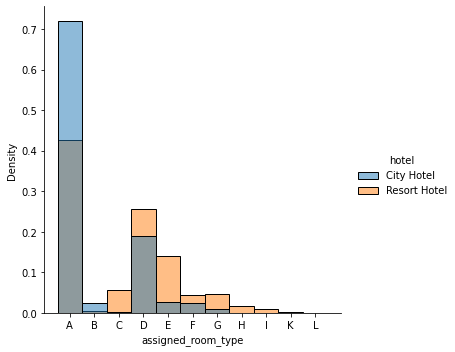

In [ ]:
contingency_table = pd.crosstab(hotel['assigned_room_type'],

                                hotel['hotel'], 
                                margins = False)
print("Contingency table:\n", contingency_table)

chi2, p, dof, ex = sci.stats.chi2_contingency(contingency_table)
print(chi2, p)

sns.displot(hotel.sort_values('assigned_room_type'), x='assigned_room_type', hue='hotel',stat="density", common_norm=False)
plt.show()

# Recomendations:
1) There is a significant difference in the proportion of cancellations between City and Resort. City clients are more likely to cancel. That might influence a difference in cancelation policy between hotels. 

2)Clients who stay at Resort for 5 days or more and prefer higher better room types, wereas clients who stay at the city hotel stay for 1 to 2.5 days and prefer room type A. Build more type A rooms in City Hotel and more C, D, E and G rooms in Resort.

3)People book more nights on avg in resort hotel and they stay in week nights. If you're going to have a special deal for booking the room the entire week you'll want to run that deal in the resort hotel.

4)City Hotel has more "no refund" type deposit, wereas resort hotel has more "no deposit". While the proportion of cancelations is lower in resort hotel there are still plenty of cancelations, get a deposit even in resort hotel.


